In [119]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [131]:
'''
Importing the text file which contains the chat of the group
in read mode using utf-8 encoding!
This is my clg group chat,it contains chats from 2018,so its a very big
file,will preview it after we've done adding regular expressions!

'''

f = open('chat1.txt','r',encoding='utf-8')
data = f.read()
data = data.split('\n')
data

['5/4/22, 7:49\u202fam - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '5/4/22, 7:49\u202fam - Alejandro Vargas: Buenas tardes',
 '5/4/22, 7:49\u202fam - Alejandro Vargas: Puerto plata',
 '5/4/22, 7:49\u202fam - Alejandro Vargas: Torre 5, Apto 120',
 '5/4/22, 7:53\u202fam - Alejandro Vargas: Le agradezco antes de las 11 am',
 '5/4/22, 7:53\u202fam - Alejandro Vargas: Gracias',
 '5/4/22, 7:56\u202fam - Lavadora: <Media omitted>',
 '5/4/22, 7:57\u202fam - Alejandro Vargas: Claro',
 '5/4/22, 7:58\u202fam - Alejandro Vargas: <Media omitted>',
 '5/4/22, 8:03\u202fam - Lavadora: <Media omitted>',
 '5/4/22, 8:04\u202fam - Alejandro Vargas: Listos',
 '5/4/22, 9:19\u202fpm - Alejandro Vargas: Buenos días',
 '5/4/22, 9:23\u202fpm - Lavadora: Buenos días',
 '5/4/22, 9:23\u202fpm - Lavadora: Como esta',
 '5/4/22, 9:24\u202fpm - Alejandro Vargas: Bien y sumerce',
 '5/4/22, 9:24\u202fpm - Alejandro Varga

In [133]:
import pandas as pd

text = [
    '5/4/22, 7:49 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
    '5/4/22, 7:49 am - Alejandro Vargas: Buenas tardes',
    '5/4/22, 7:49 am - Alejandro Vargas: Puerto plata',
    # ... (all the other messages)
]

def gettimeanddate(string):
    # Split the string by the first '-' to separate date and message
    parts = string.split('-', 1)
    if len(parts) == 2:
        date, message = parts
        # Split the date by ',' to separate date and time
        date_parts = date.split(',')
        if len(date_parts) == 2:
            date = date_parts[0].strip()
            time = date_parts[1].strip()
            # Extract user from the message
            user_message_parts = message.split(':', 1)
            if len(user_message_parts) == 2:
                user = user_message_parts[0].strip()
                message = user_message_parts[1].strip()
                return date, time, user, message

    # If the input format doesn't match the expected format, return None for all fields
    return None, None, None, None

# Initialize empty lists to store extracted data
dates = []
times = []
users = []
messages = []

for i in data:
    date, time, user, message = gettimeanddate(i)
    if date is not None:
        dates.append(date)
        times.append(time)
        users.append(user)
        messages.append(message)

# Create a DataFrame
data = {
    'Date': dates,
    'Time': times,
    'User': users,
    'Message': messages
}

df = pd.DataFrame(data)

# Display the DataFrame
df


,Date,Time,User,Message
0,5/4/22,7:49 am,Alejandro Vargas,Buenas tardes
1,5/4/22,7:49 am,Alejandro Vargas,Puerto plata
2,5/4/22,7:49 am,Alejandro Vargas,"Torre 5, Apto 120"
3,5/4/22,7:53 am,Alejandro Vargas,Le agradezco antes de las 11 am
4,5/4/22,7:53 am,Alejandro Vargas,Gracias
5,5/4/22,7:56 am,Lavadora,<Media omitted>
6,5/4/22,7:57 am,Alejandro Vargas,Claro
7,5/4/22,7:58 am,Alejandro Vargas,<Media omitted>
8,5/4/22,8:03 am,Lavadora,<Media omitted>
9,5/4/22,8:04 am,Alejandro Vargas,Listos


In [175]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month_num'] = pd.to_datetime(df['Date']).dt.month
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df

,Date,Time,User,Message,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,5/4/22,7:49 am,Alejandro Vargas,Buenas tardes,2022-05-04,2022,5,May,4,Wednesday,7,49
1,5/4/22,7:49 am,Alejandro Vargas,Puerto plata,2022-05-04,2022,5,May,4,Wednesday,7,49
2,5/4/22,7:49 am,Alejandro Vargas,"Torre 5, Apto 120",2022-05-04,2022,5,May,4,Wednesday,7,49
3,5/4/22,7:53 am,Alejandro Vargas,Le agradezco antes de las 11 am,2022-05-04,2022,5,May,4,Wednesday,7,53
4,5/4/22,7:53 am,Alejandro Vargas,Gracias,2022-05-04,2022,5,May,4,Wednesday,7,53
5,5/4/22,7:56 am,Lavadora,<Media omitted>,2022-05-04,2022,5,May,4,Wednesday,7,56
6,5/4/22,7:57 am,Alejandro Vargas,Claro,2022-05-04,2022,5,May,4,Wednesday,7,57
7,5/4/22,7:58 am,Alejandro Vargas,<Media omitted>,2022-05-04,2022,5,May,4,Wednesday,7,58
8,5/4/22,8:03 am,Lavadora,<Media omitted>,2022-05-04,2022,5,May,4,Wednesday,8,3
9,5/4/22,8:04 am,Alejandro Vargas,Listos,2022-05-04,2022,5,May,4,Wednesday,8,4


In [176]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

187


In [177]:
words

['Buenas',
 'tardes',
 'Puerto',
 'plata',
 'Torre',
 '5,',
 'Apto',
 '120',
 'Le',
 'agradezco',
 'antes',
 'de',
 'las',
 '11',
 'am',
 'Gracias',
 '<Media',
 'omitted>',
 'Claro',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'Listos',
 'Buenos',
 'días',
 'Buenos',
 'días',
 'Como',
 'esta',
 'Bien',
 'y',
 'sumerce',
 'Como',
 'amanece',
 'Buen',
 'gracias',
 'A',
 'Dios',
 'Paso',
 'a',
 'si',
 'casa',
 'a',
 'eso',
 'de',
 'las',
 '8y30',
 '9',
 'Ok',
 'Muchas',
 'gracias',
 'No',
 'no',
 'a',
 'sumerse',
 'Que',
 'mas',
 'amigazo,',
 'donde',
 'vienes?',
 'Compita',
 'estoy',
 'como',
 'a',
 'mitad',
 'de',
 'camino',
 'estaba',
 'pagando',
 'unos',
 'recibos',
 '😳😱',
 'Nada',
 'de',
 'nervios',
 'Estoy',
 'pendiente',
 '👍🏻👍🏻😂😂',
 'Compa',
 'Estoy',
 'en',
 'la',
 'Torre',
 'Ok',
 'Compa,',
 'se',
 'te',
 'quedó',
 'esto',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'Quiubo',
 'compa',
 'Alcanzas',
 'a',
 'pasar',
 'ahorita?',
 'Me',
 'actualizas',
 'del',
 'asunto',
 '

In [180]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Alejandro Vargas')].shape

(2, 12)

In [181]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Alejandro Vargas')]

,Date,Time,User,Message,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
7,5/4/22,7:58 am,Alejandro Vargas,<Media omitted>,2022-05-04,2022,5,May,4,Wednesday,7,58
30,6/4/22,1:54 am,Alejandro Vargas,<Media omitted>,2022-06-04,2022,6,June,4,Saturday,1,54


In [182]:
df['Message'].unique()

array(['Buenas tardes', 'Puerto plata', 'Torre 5, Apto 120',
       'Le agradezco antes de las 11 am', 'Gracias', '<Media omitted>',
       'Claro', 'Listos', 'Buenos días', 'Como esta', 'Bien y sumerce',
       'Como amanece', 'Buen gracias', 'A Dios',
       'Paso a si casa a eso de las 8y30 9', 'Ok', 'Muchas gracias',
       'No no a sumerse', 'Que mas amigazo, donde vienes?',
       'Compita estoy como a mitad de camino estaba pagando unos recibos 😳😱',
       'Nada de nervios', 'Estoy pendiente', '👍🏻👍🏻😂😂', 'Compa',
       'Estoy en la Torre', 'Compa, se te quedó esto', 'Quiubo compa',
       'Alcanzas a pasar ahorita?', 'Me actualizas del asunto',
       'Pero los arreglo, que paso con eso???',
       'Hágale compa, yo estoy mañana acá', 'Quiubo amigazo, buenos días',
       'Que mas compa buenos días', 'Estoy en esas con las Barillas',
       'Un resorte me quedo muy corto',
       'Voy para el puente Guaduas a cambiarlo',
       'Vale, alcanzas a pasar hoy?',
       'Listo compad

In [183]:
df[df['Message']=='<Media omitted>']

,Date,Time,User,Message,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
5,5/4/22,7:56 am,Lavadora,<Media omitted>,2022-05-04,2022,5,May,4,Wednesday,7,56
7,5/4/22,7:58 am,Alejandro Vargas,<Media omitted>,2022-05-04,2022,5,May,4,Wednesday,7,58
8,5/4/22,8:03 am,Lavadora,<Media omitted>,2022-05-04,2022,5,May,4,Wednesday,8,3
30,6/4/22,1:54 am,Alejandro Vargas,<Media omitted>,2022-06-04,2022,6,June,4,Saturday,1,54
31,6/4/22,1:55 am,Lavadora,<Media omitted>,2022-06-04,2022,6,June,4,Saturday,1,55
35,6/4/22,9:57 am,Lavadora,<Media omitted>,2022-06-04,2022,6,June,4,Saturday,9,57
38,6/4/22,10:04 am,Lavadora,<Media omitted>,2022-06-04,2022,6,June,4,Saturday,10,4
46,7/4/22,2:14 am,Lavadora,<Media omitted>,2022-07-04,2022,7,July,4,Monday,2,14
50,7/4/22,3:09 am,Lavadora,<Media omitted>,2022-07-04,2022,7,July,4,Monday,3,9
52,7/4/22,3:22 am,Lavadora,<Media omitted>,2022-07-04,2022,7,July,4,Monday,3,22


In [184]:
df['User'].value_counts().head()

Alejandro Vargas    32
Lavadora            24
Name: User, dtype: int64

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

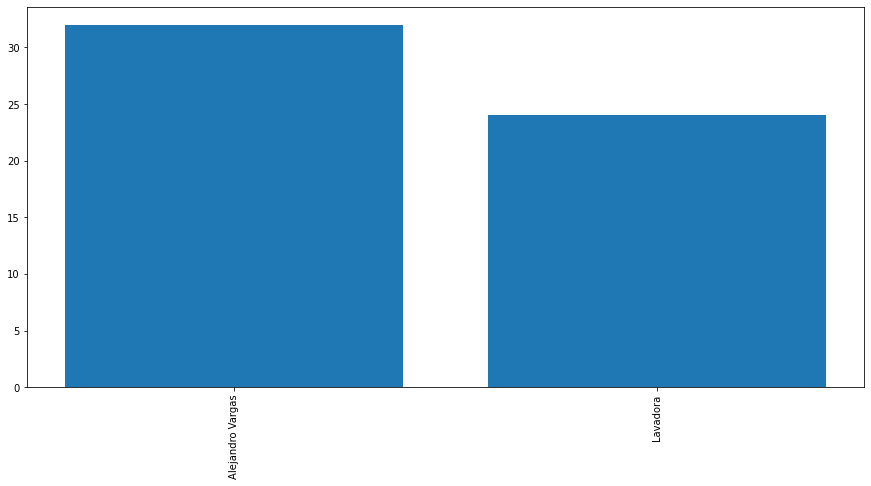

In [185]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')


In [186]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
            
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'<Media': 11,
 'omitted>': 11,
 'a': 8,
 'de': 4,
 'días': 4,
 'las': 3,
 'Ok': 3,
 'Estoy': 3,
 'te': 3,
 'con': 3,
 'Torre': 2,
 'agradezco': 2,
 'Buenos': 2,
 'Como': 2,
 'sumerce': 2,
 'gracias': 2,
 'No': 2,
 'Que': 2,
 'mas': 2,
 'amigazo,': 2,
 'estoy': 2,
 'pendiente': 2,
 'en': 2,
 'la': 2,
 'Quiubo': 2,
 'compa': 2,
 'pasar': 2,
 'los': 2,
 'acá': 2,
 'buenos': 2,
 'Buenas': 1,
 'tardes': 1,
 'Puerto': 1,
 'plata': 1,
 '5,': 1,
 'Apto': 1,
 '120': 1,
 'Le': 1,
 'antes': 1,
 '11': 1,
 'am': 1,
 'Gracias': 1,
 'Claro': 1,
 'Listos': 1,
 'esta': 1,
 'Bien': 1,
 'y': 1,
 'amanece': 1,
 'Buen': 1,
 'A': 1,
 'Dios': 1,
 'Paso': 1,
 'si': 1,
 'casa': 1,
 'eso': 1,
 '8y30': 1,
 '9': 1,
 'Muchas': 1,
 'no': 1,
 'sumerse': 1,
 'donde': 1,
 'vienes?': 1,
 'Compita': 1,
 'como': 1,
 'mitad': 1,
 'camino': 1,
 'estaba': 1,
 'pagando': 1,
 'unos': 1,
 'recibos': 1,
 '😳😱': 1,
 'Nada': 1,
 'nervios': 1,
 '👍🏻👍🏻😂😂': 1,
 'Compa': 1,
 'Compa,': 1,
 'se': 1,
 'quedó': 1,
 'esto': 1,
 'Alcanzas':

In [187]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,<Media,11
1,omitted>,11
2,a,8
3,de,4
4,días,4
5,las,3
6,Ok,3
7,Estoy,3
8,te,3
9,con,3


In [148]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Date,Time,User,Message,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,5/4/22,7:49 am,Alejandro Vargas,Buenas tardes,2022-05-04,2022,5,May,4,Wednesday,0,0
1,5/4/22,7:49 am,Alejandro Vargas,Puerto plata,2022-05-04,2022,5,May,4,Wednesday,0,0
2,5/4/22,7:49 am,Alejandro Vargas,"Torre 5, Apto 120",2022-05-04,2022,5,May,4,Wednesday,0,0
3,5/4/22,7:53 am,Alejandro Vargas,Le agradezco antes de las 11 am,2022-05-04,2022,5,May,4,Wednesday,0,0
4,5/4/22,7:53 am,Alejandro Vargas,Gracias,2022-05-04,2022,5,May,4,Wednesday,0,0
5,5/4/22,7:56 am,Lavadora,<Media omitted>,2022-05-04,2022,5,May,4,Wednesday,0,0
6,5/4/22,7:57 am,Alejandro Vargas,Claro,2022-05-04,2022,5,May,4,Wednesday,0,0
7,5/4/22,7:58 am,Alejandro Vargas,<Media omitted>,2022-05-04,2022,5,May,4,Wednesday,0,0
8,5/4/22,8:03 am,Lavadora,<Media omitted>,2022-05-04,2022,5,May,4,Wednesday,0,0
9,5/4/22,8:04 am,Alejandro Vargas,Listos,2022-05-04,2022,5,May,4,Wednesday,0,0


In [189]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_spanish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon


,0,1
0,<media,11
1,omitted>,11
2,días,4
3,gracias,3
4,ok,3
5,compa,3
6,torre,2
7,agradezco,2
8,sumerce,2
9,paso,2


In [190]:
'''
We want the count of messages month-wise,
so we will apply group by and then by 
adding reset_index() we will get the 
result in a dataframe format

then we will add the "Year and month columns" 
like "January-2018",so that to analyze the things become simple

'''


def monthtimeline(selecteduser,df):


    temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index().sort_values(['Message'])
    
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
        
    temp['Time'] = time
    
    return temp

In [191]:
df.head()

,Date,Time,User,Message,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,5/4/22,7:49 am,Alejandro Vargas,Buenas tardes,2022-05-04,2022,5,May,4,Wednesday,7,49
1,5/4/22,7:49 am,Alejandro Vargas,Puerto plata,2022-05-04,2022,5,May,4,Wednesday,7,49
2,5/4/22,7:49 am,Alejandro Vargas,"Torre 5, Apto 120",2022-05-04,2022,5,May,4,Wednesday,7,49
3,5/4/22,7:53 am,Alejandro Vargas,Le agradezco antes de las 11 am,2022-05-04,2022,5,May,4,Wednesday,7,53
4,5/4/22,7:53 am,Alejandro Vargas,Gracias,2022-05-04,2022,5,May,4,Wednesday,7,53


In [193]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2022,5,May,26
1,2022,6,June,14
2,2022,7,July,16


In [194]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2022,5,May,26
1,2022,6,June,14
2,2022,7,July,16


In [195]:
temp.shape

(3, 4)

In [196]:
str(temp['Month'][0])+"-"+str(temp['Year'][0])

'May-2022'

In [197]:
time = []
for i in range(temp.shape[0]):
    time.append(temp['Month'][i]+ "-" +str(temp['Year'][i]))
    
temp['Time'] = time

temp

,Year,Month_num,Month,Message,Time
0,2022,5,May,26,May-2022
1,2022,6,June,14,June-2022
2,2022,7,July,16,July-2022


In [198]:
temp

,Year,Month_num,Month,Message,Time
0,2022,5,May,26,May-2022
1,2022,6,June,14,June-2022
2,2022,7,July,16,July-2022


In [199]:
df.head()

,Date,Time,User,Message,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,5/4/22,7:49 am,Alejandro Vargas,Buenas tardes,2022-05-04,2022,5,May,4,Wednesday,7,49
1,5/4/22,7:49 am,Alejandro Vargas,Puerto plata,2022-05-04,2022,5,May,4,Wednesday,7,49
2,5/4/22,7:49 am,Alejandro Vargas,"Torre 5, Apto 120",2022-05-04,2022,5,May,4,Wednesday,7,49
3,5/4/22,7:53 am,Alejandro Vargas,Le agradezco antes de las 11 am,2022-05-04,2022,5,May,4,Wednesday,7,53
4,5/4/22,7:53 am,Alejandro Vargas,Gracias,2022-05-04,2022,5,May,4,Wednesday,7,53


In [200]:
temp1 = df['Day_name'].value_counts()

In [201]:
temp1

Wednesday    26
Monday       16
Saturday     14
Name: Day_name, dtype: int64

In [170]:
list(temp1.index)

['Wednesday', 'Monday', 'Saturday']

In [171]:
list(temp1.values)

[26, 16, 14]

In [172]:
temp2 = df['Month'].value_counts()

In [173]:
temp2

May     26
July    16
June    14
Name: Month, dtype: int64

In [174]:
list(temp2.index),list(temp2.values)

(['May', 'July', 'June'], [26, 16, 14])